In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/premier-league-all-players-stats-2324/premier-player-23-24.csv


# Import Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Read My Dataset

In [3]:
df = pd.read_csv('/kaggle/input/premier-league-all-players-stats-2324/premier-player-23-24.csv')
df.sample(10)

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
194,Sergio Reguilón,es ESP,DF,26.0,9,4,412.0,4.6,0.0,0.0,...,0.00,0.00,0.00,0.00,0.04,0.16,0.20,0.04,0.20,Manchester United
7,Rúben Dias,pt POR,DF,26.0,30,28,2559.0,28.4,0.0,0.0,...,0.00,0.00,0.00,0.00,0.05,0.01,0.06,0.05,0.06,Manchester City
128,Elliot Anderson,sct SCO,"MF,FW",20.0,21,10,1027.0,11.4,0.0,2.0,...,0.18,0.18,0.00,0.18,0.13,0.17,0.30,0.13,0.30,Newcastle United
59,Bukayo Saka,eng ENG,FW,21.0,35,35,2919.0,32.4,16.0,9.0,...,0.28,0.77,0.31,0.59,0.48,0.32,0.80,0.33,0.65,Arsenal
373,Marcos Senesi,ar ARG,DF,26.0,31,26,2242.0,24.9,4.0,5.0,...,0.20,0.36,0.16,0.36,0.08,0.07,0.15,0.08,0.15,Bournemouth
170,Dane Scarlett,eng ENG,FW,19.0,4,0,22.0,0.2,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Tottenham Hotspur
543,Michael Obafemi,ie IRL,"FW,MF",23.0,2,0,20.0,0.2,0.0,0.0,...,0.00,0.00,0.00,0.00,0.40,0.00,0.40,0.40,0.40,Burnley
368,Illia Zabarnyi,ua UKR,DF,20.0,37,37,3330.0,37.0,1.0,0.0,...,0.00,0.03,0.03,0.03,0.03,0.01,0.04,0.03,0.04,Bournemouth
243,Edson Álvarez,mx MEX,MF,25.0,31,28,2377.0,26.4,1.0,1.0,...,0.04,0.08,0.04,0.08,0.05,0.02,0.07,0.05,0.07,West Ham United
86,Enzo Fernández,ar ARG,MF,22.0,28,26,2209.0,24.5,3.0,2.0,...,0.08,0.20,0.08,0.16,0.25,0.14,0.39,0.19,0.33,Chelsea


# Get Informations About My Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       580 non-null    object 
 1   Nation       580 non-null    object 
 2   Pos          580 non-null    object 
 3   Age          580 non-null    float64
 4   MP           580 non-null    int64  
 5   Starts       580 non-null    int64  
 6   Min          580 non-null    float64
 7   90s          580 non-null    float64
 8   Gls          580 non-null    float64
 9   Ast          580 non-null    float64
 10  G+A          580 non-null    float64
 11  G-PK         580 non-null    float64
 12  PK           580 non-null    float64
 13  PKatt        580 non-null    float64
 14  CrdY         580 non-null    float64
 15  CrdR         580 non-null    float64
 16  xG           580 non-null    float64
 17  npxG         580 non-null    float64
 18  xAG          580 non-null    float64
 19  npxG+xAG

# Check For Null Values

In [5]:
df.isnull().sum()

Player         0
Nation         0
Pos            0
Age            0
MP             0
Starts         0
Min            0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PK             0
PKatt          0
CrdY           0
CrdR           0
xG             0
npxG           0
xAG            0
npxG+xAG       0
PrgC           0
PrgP           0
PrgR           0
Gls_90         0
Ast_90         0
G+A_90         0
G-PK_90        0
G+A-PK_90      0
xG_90          0
xAG_90         0
xG+xAG_90      0
npxG_90        0
npxG+xAG_90    0
Team           0
dtype: int64

# Check For Duplication

In [6]:
df.duplicated().sum()

0

# Get Describtion About My Data

In [7]:
df.describe()

,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,...,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,24.906897,19.627586,14.413793,1294.584483,14.383448,2.063793,1.481034,3.544828,1.898276,0.165517,...,0.125259,0.091621,0.216810,0.118155,0.209638,0.144983,0.100707,0.245845,0.138431,0.239466
std,4.464593,11.832419,11.926422,1024.720358,11.385342,3.621238,2.360729,5.391389,3.189739,0.779830,...,0.223161,0.160703,0.297085,0.214342,0.287035,0.222225,0.210713,0.348004,0.213947,0.340631
min,15.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,9.000000,3.000000,342.750000,3.775000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.017500,0.010000,0.060000,0.017500,0.060000
50%,25.000000,20.000000,13.000000,1164.000000,12.950000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.030000,0.000000,0.100000,0.030000,0.100000,0.070000,0.060000,0.145000,0.070000,0.145000
75%,28.000000,30.000000,25.000000,2104.250000,23.400000,2.000000,2.000000,4.000000,2.000000,0.000000,...,0.170000,0.130000,0.310000,0.160000,0.300000,0.190000,0.140000,0.370000,0.180000,0.350000
max,38.000000,38.000000,38.000000,3420.000000,38.000000,27.000000,13.000000,33.000000,20.000000,9.000000,...,2.650000,1.700000,2.650000,2.650000,2.650000,3.230000,4.440000,5.540000,3.230000,5.540000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,580.0,24.906897,4.464593,15.0,21.0000,25.000,28.00,38.00
MP,580.0,19.627586,11.832419,1.0,9.0000,20.000,30.00,38.00
Starts,580.0,14.413793,11.926422,0.0,3.0000,13.000,25.00,38.00
Min,580.0,1294.584483,1024.720358,1.0,342.7500,1164.000,2104.25,3420.00
90s,580.0,14.383448,11.385342,0.0,3.7750,12.950,23.40,38.00
Gls,580.0,2.063793,3.621238,0.0,0.0000,1.000,2.00,27.00
Ast,580.0,1.481034,2.360729,0.0,0.0000,0.000,2.00,13.00
G+A,580.0,3.544828,5.391389,0.0,0.0000,1.000,4.00,33.00
G-PK,580.0,1.898276,3.189739,0.0,0.0000,1.000,2.00,20.00
PK,580.0,0.165517,0.779830,0.0,0.0000,0.000,0.00,9.00


In [9]:
df.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


# Show Columns Of Dataset

In [10]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls_90', 'Ast_90', 'G+A_90',
       'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90', 'xG+xAG_90', 'npxG_90',
       'npxG+xAG_90', 'Team'],
      dtype='object')

# Working On Age Column

## What Is The Biggest 10 Players In Age??

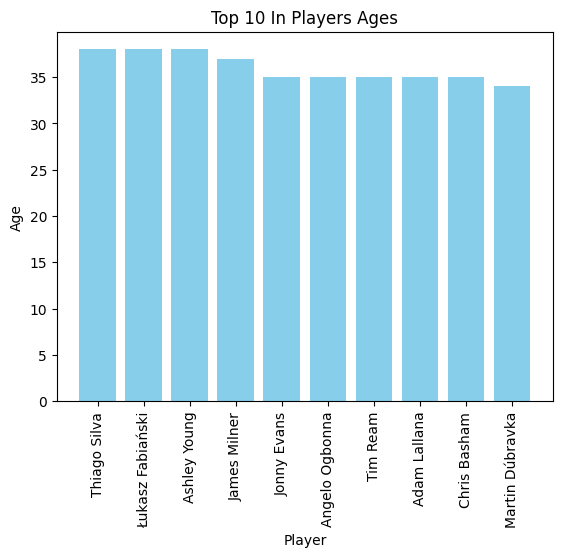

In [11]:
top_ten = df.nlargest(10 , 'Age')
plt.bar(top_ten['Player'], top_ten['Age'], color='skyblue')
plt.title('Top 10 In Players Ages')
plt.xlabel('Player')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

## What Is The Smallest 10 Players In Age??

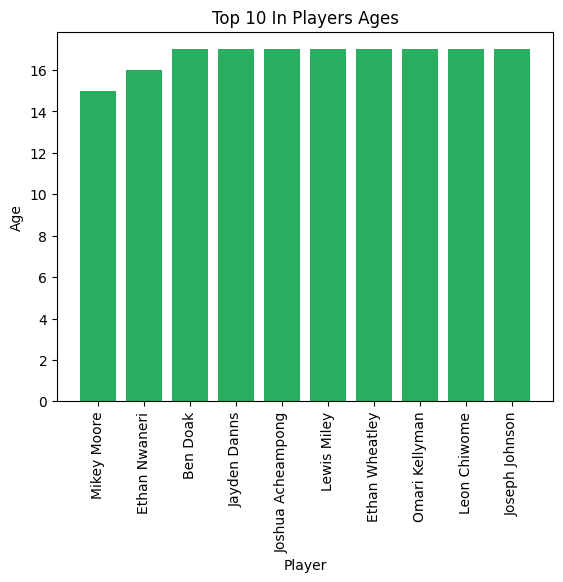

In [12]:
less_ten = df.nsmallest(10 , 'Age')
plt.bar(less_ten['Player'], less_ten['Age'], color='#27ae60')
plt.title('Top 10 In Players Ages')
plt.xlabel('Player')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()

## Which Team Has The Biggest Number Of Players Above 30??

In [13]:
above_30 = df[df['Age'] > 30]
above_30

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City
13,Kevin De Bruyne,be BEL,MF,32.0,18,15,1221.0,13.6,4.0,10.0,...,0.74,1.03,0.29,1.03,0.18,0.85,1.03,0.18,1.03,Manchester City
25,Virgil van Dijk,nl NED,DF,32.0,36,36,3177.0,35.3,2.0,2.0,...,0.06,0.11,0.06,0.11,0.08,0.04,0.12,0.08,0.12,Liverpool
28,Mohamed Salah,eg EGY,FW,31.0,32,28,2534.0,28.2,18.0,10.0,...,0.36,0.99,0.46,0.82,0.75,0.42,1.17,0.55,0.97,Liverpool
45,Joël Matip,cm CMR,DF,31.0,10,9,781.0,8.7,0.0,0.0,...,0.00,0.00,0.00,0.00,0.06,0.01,0.06,0.06,0.06,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,Jack Cork,eng ENG,MF,34.0,4,0,27.0,0.3,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Burnley
550,Wes Foderingham,eng ENG,GK,32.0,30,29,2649.0,29.4,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United
554,Oliver Norwood,nir NIR,MF,32.0,27,16,1440.0,16.0,1.0,0.0,...,0.00,0.06,0.00,0.00,0.07,0.04,0.11,0.02,0.06,Sheffield United
571,Chris Basham,eng ENG,"DF,MF",35.0,8,3,321.0,3.6,0.0,0.0,...,0.00,0.00,0.00,0.00,0.04,0.07,0.10,0.04,0.10,Sheffield United


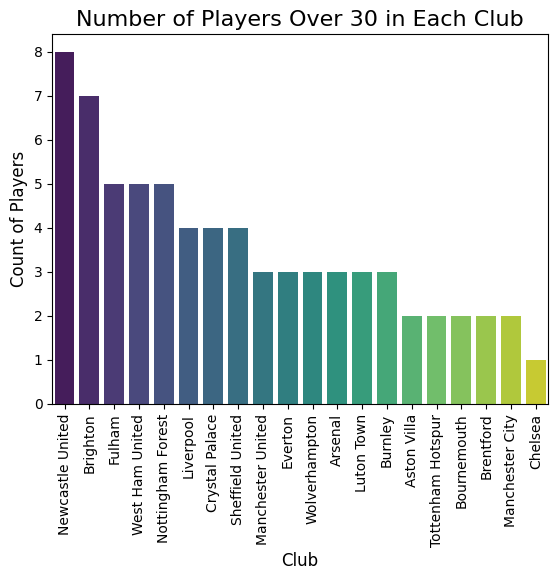

In [14]:
club_counts = above_30['Team'].value_counts().reset_index()
club_counts.columns = ['Team' , 'Count']
sns.barplot(x='Team', y='Count', data=club_counts, palette='viridis')
plt.title('Number of Players Over 30 in Each Club', fontsize=16)
plt.xlabel('Club', fontsize=12)
plt.ylabel('Count of Players', fontsize=12)
plt.xticks(rotation = 90)
plt.show()

## Which Team Has The Biggest Number Of Players Between 20 And 30??

In [15]:
less_30 = df[(df['Age'] < 30) & (df['Age'] > 20)]
less_30

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
5,Bernardo Silva,pt POR,"MF,FW",28.0,33,29,2578.0,28.6,6.0,9.0,...,0.31,0.52,0.21,0.52,0.13,0.27,0.40,0.13,0.40,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Max Lowe,eng ENG,"DF,MF",26.0,10,4,503.0,5.6,0.0,0.0,...,0.00,0.00,0.00,0.00,0.10,0.13,0.23,0.10,0.23,Sheffield United
568,Anis Ben Slimane,tn TUN,MF,22.0,15,4,419.0,4.7,0.0,0.0,...,0.00,0.00,0.00,0.00,0.17,0.06,0.23,0.17,0.23,Sheffield United
570,Rhian Brewster,eng ENG,"FW,MF",23.0,13,3,346.0,3.8,0.0,0.0,...,0.00,0.00,0.00,0.00,0.09,0.03,0.12,0.09,0.12,Sheffield United
572,Tom Davies,eng ENG,MF,25.0,9,2,221.0,2.5,0.0,0.0,...,0.00,0.00,0.00,0.00,0.14,0.03,0.17,0.14,0.17,Sheffield United


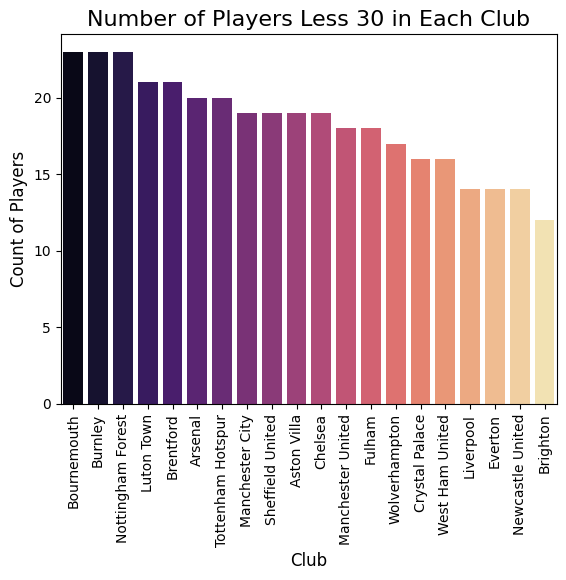

In [16]:
club_counts = less_30['Team'].value_counts().reset_index()
club_counts.columns = ['Team' , 'Count']
sns.barplot(x='Team', y='Count', data=club_counts, palette='magma')
plt.title('Number of Players Less 30 in Each Club', fontsize=16)
plt.xlabel('Club', fontsize=12)
plt.ylabel('Count of Players', fontsize=12)
plt.xticks(rotation = 90)
plt.show()

## Which Team Has The Biggest Number Of Players Less 20??

In [17]:
less_20 = df[df['Age'] < 20]
less_20

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
16,Rico Lewis,eng ENG,"DF,MF",18.0,16,8,809.0,9.0,2.0,0.0,...,0.0,0.22,0.22,0.22,0.07,0.12,0.19,0.07,0.19,Manchester City
47,Bobby Clark,eng ENG,MF,18.0,5,1,89.0,1.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.14,0.00,0.14,0.14,0.14,Liverpool
48,Stefan Bajcetic,es ESP,MF,18.0,1,0,26.0,0.3,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Liverpool
49,Ben Doak,sct SCO,FW,17.0,1,0,14.0,0.2,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Liverpool
50,Jayden Danns,eng ENG,FW,17.0,2,0,9.0,0.1,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Sam Curtis,ie IRL,DF,17.0,1,0,28.0,0.3,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United
576,Daniel Jebbison,eng ENG,FW,19.0,1,0,21.0,0.2,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United
577,Antwoine Hackford,eng ENG,FW,19.0,2,0,13.0,0.1,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United
578,Sydie Peck,eng ENG,MF,18.0,1,0,10.0,0.1,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United


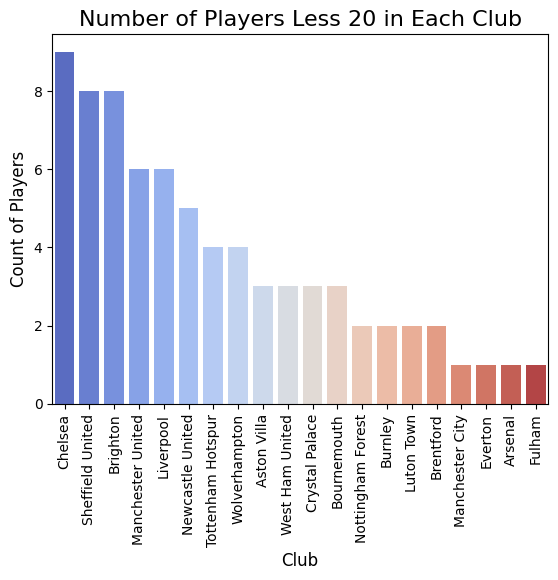

In [18]:
less_20 = df[df['Age'] < 20]
club_counts = less_20['Team'].value_counts().reset_index()
club_counts.columns = ['Team' , 'Count']
sns.barplot(x='Team', y='Count', data=club_counts, palette='coolwarm')
plt.title('Number of Players Less 20 in Each Club', fontsize=16)
plt.xlabel('Club', fontsize=12)
plt.ylabel('Count of Players', fontsize=12)
plt.xticks(rotation = 90)
plt.show()

## Number Of Goals And Assists For Players Above 30??

In [19]:
above_30['G+A'].sum()

247.0

## Number Of Goals And Assists For Players Less 30??

In [20]:
less_30['G+A'].sum()

1627.0

## Number Of Goals And Assists For Players Less 20??

In [21]:
less_20['G+A'].sum()

62.0

In [22]:
df

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Sam Curtis,ie IRL,DF,17.0,1,0,28.0,0.3,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United
576,Daniel Jebbison,eng ENG,FW,19.0,1,0,21.0,0.2,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United
577,Antwoine Hackford,eng ENG,FW,19.0,2,0,13.0,0.1,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United
578,Sydie Peck,eng ENG,MF,18.0,1,0,10.0,0.1,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United


# Working On Nation Column

## Distribution Of Countries??

In [23]:
df['Nation'].value_counts()

Nation
eng ENG    199
br BRA      33
fr FRA      28
es ESP      20
nl NED      19
          ... 
ga GAB       1
tr TUR       1
gw GNB       1
il ISR       1
cl CHI       1
Name: count, Length: 66, dtype: int64

## Top 10 Countries Have Players In PL??

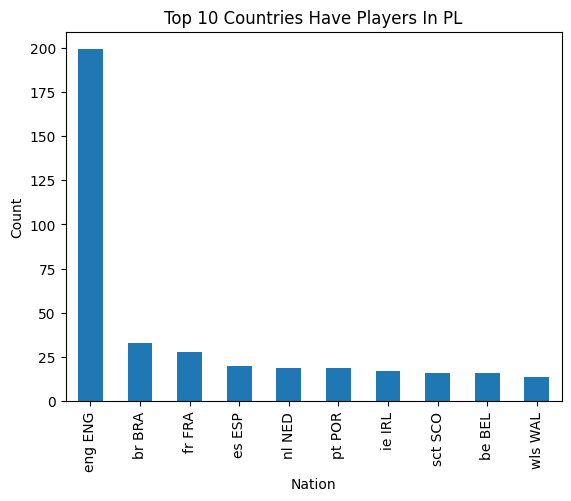

In [24]:
df['Nation'].value_counts().nlargest(10).plot(kind = 'bar')
plt.title('Top 10 Countries Have Players In PL')
plt.xlabel('Nation')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## Top 10 Nations Have Goals In PL??

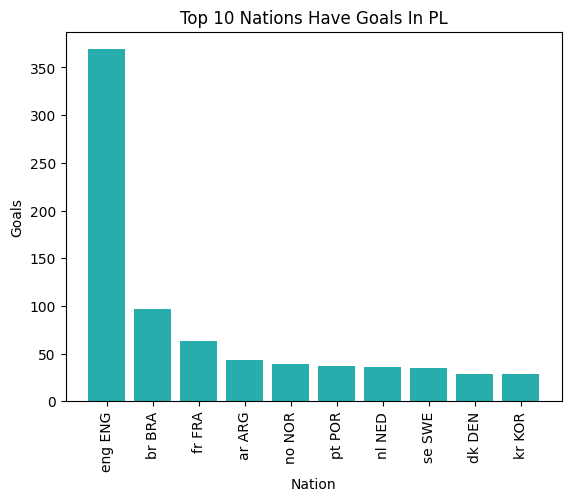

In [25]:
top_ten_goals = df.groupby('Nation')['Gls'].sum().nlargest(10).reset_index()
plt.bar(top_ten_goals['Nation'], top_ten_goals['Gls'], color='#27aeac')
plt.title('Top 10 Nations Have Goals In PL')
plt.xlabel('Nation')
plt.ylabel('Goals')
plt.xticks(rotation = 90)
plt.show()

## Top 10 Nations Have Assists In PL???

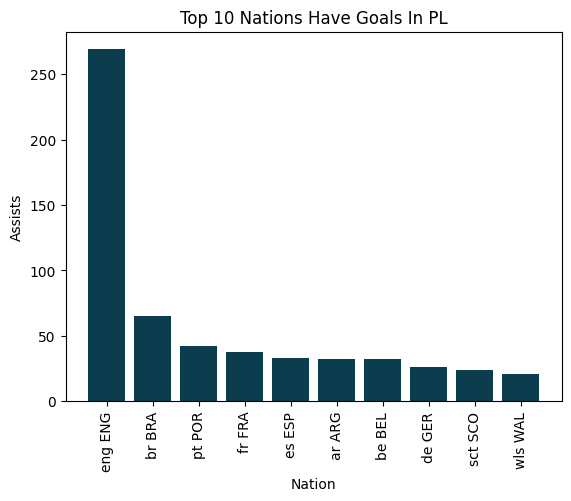

In [26]:
top_ten_assists = df.groupby('Nation')['Ast'].sum().nlargest(10).reset_index()
plt.bar(top_ten_assists['Nation'], top_ten_assists['Ast'], color='#0b3d4f')
plt.title('Top 10 Nations Have Goals In PL')
plt.xlabel('Nation')
plt.ylabel('Assists')
plt.xticks(rotation = 90)
plt.show()

## Top 10 Nations Have Goals And Assists In PL???

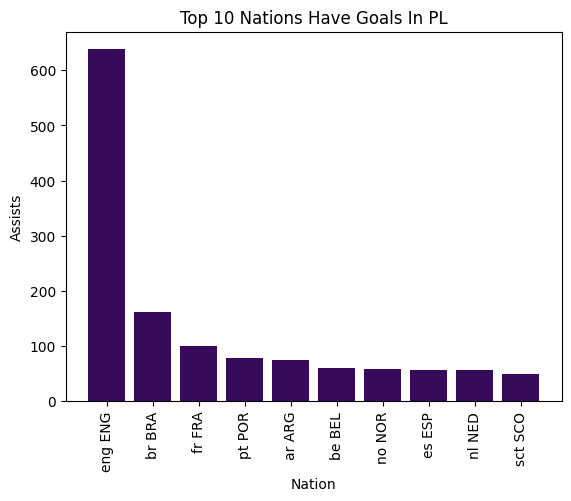

In [27]:
top_ten_goals_assists = df.groupby('Nation')['G+A'].sum().nlargest(10).reset_index()
plt.bar(top_ten_goals_assists['Nation'], top_ten_goals_assists['G+A'], color='#380a5a')
plt.title('Top 10 Nations Have Goals In PL')
plt.xlabel('Nation')
plt.ylabel('Assists')
plt.xticks(rotation = 90)
plt.show()

In [28]:
not_england_players = df[df['Nation'] != 'eng ENG']
not_england_players

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
5,Bernardo Silva,pt POR,"MF,FW",28.0,33,29,2578.0,28.6,6.0,9.0,...,0.31,0.52,0.21,0.52,0.13,0.27,0.40,0.13,0.40,Manchester City
6,Erling Haaland,no NOR,FW,23.0,31,29,2552.0,28.4,27.0,5.0,...,0.18,1.13,0.71,0.88,1.03,0.15,1.18,0.81,0.96,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,Bénie Adama Traore,ci CIV,"FW,MF",20.0,8,3,387.0,4.3,0.0,0.0,...,0.00,0.00,0.00,0.00,0.06,0.13,0.19,0.06,0.19,Sheffield United
573,Rhys Norrington-Davies,wls WAL,DF,24.0,5,2,110.0,1.2,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.01,Sheffield United
574,John Fleck,sct SCO,"MF,DF",31.0,4,1,92.0,1.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.44,0.44,0.00,0.44,Sheffield United
575,Sam Curtis,ie IRL,DF,17.0,1,0,28.0,0.3,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United


## Top 10 Countries Have Players In PL(Exlude England Players)??

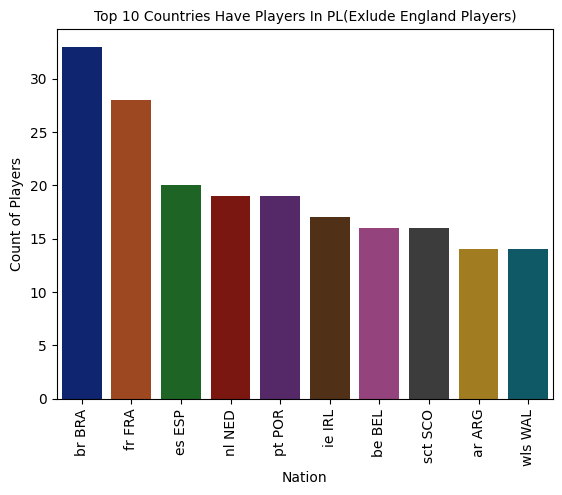

In [29]:
top_not_eng_players = not_england_players['Nation'].value_counts().nlargest(10).reset_index()
top_not_eng_players.columns = ['Nation' , 'Count']
sns.barplot(x='Nation', y='Count', data=top_not_eng_players, palette='dark')
plt.title('Top 10 Countries Have Players In PL(Exlude England Players)' , fontsize = 10)
plt.xlabel('Nation')
plt.ylabel('Count of Players')
plt.xticks(rotation = 90)
plt.show()

## Top 10 Countries Have Players Have Less 20 Years??

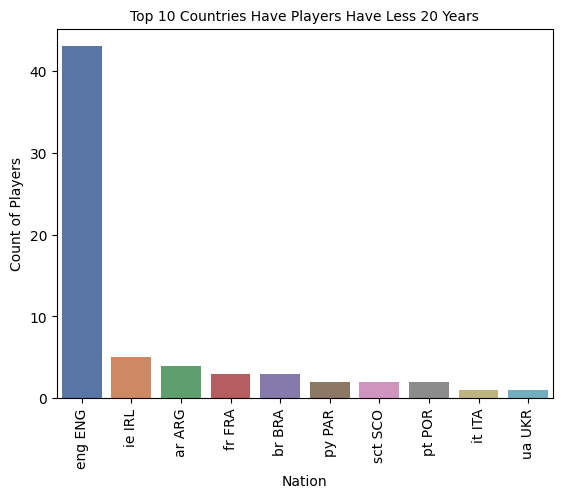

In [30]:
top_country_less_20 = less_20['Nation'].value_counts().nlargest(10).reset_index()
top_country_less_20.columns = ['Nation' , 'Count']
sns.barplot(x='Nation', y='Count', data=top_country_less_20, palette='deep')
plt.title('Top 10 Countries Have Players Have Less 20 Years' , fontsize = 10)
plt.xlabel('Nation')
plt.ylabel('Count of Players')
plt.xticks(rotation = 90)
plt.show()

## Top 10 Teams Have Foreign Players In PL??

In [31]:
top_foreign_team = not_england_players['Team'].value_counts().nlargest(10).reset_index()
top_foreign_team

,Team,count
0,Nottingham Forest,28
1,Burnley,24
2,Fulham,23
3,Tottenham Hotspur,23
4,Wolverhampton,22
5,Brentford,21
6,Manchester United,21
7,Liverpool,21
8,Brighton,20
9,Aston Villa,19


## Plot Top 10 Teams Have Foreign Players In PL

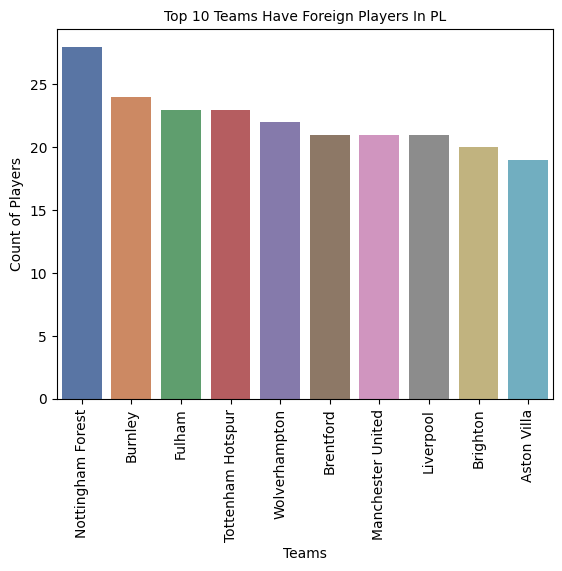

In [32]:
top_foreign_team.columns = ['Nation' , 'Count']
sns.barplot(x='Nation', y='Count', data=top_foreign_team, palette='deep')
plt.title('Top 10 Teams Have Foreign Players In PL' , fontsize = 10)
plt.xlabel('Teams')
plt.ylabel('Count of Players')
plt.xticks(rotation = 90)
plt.show()

In [33]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls_90', 'Ast_90', 'G+A_90',
       'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90', 'xG+xAG_90', 'npxG_90',
       'npxG+xAG_90', 'Team'],
      dtype='object')

# Working On Goals Column

## Top 10 Scorers??

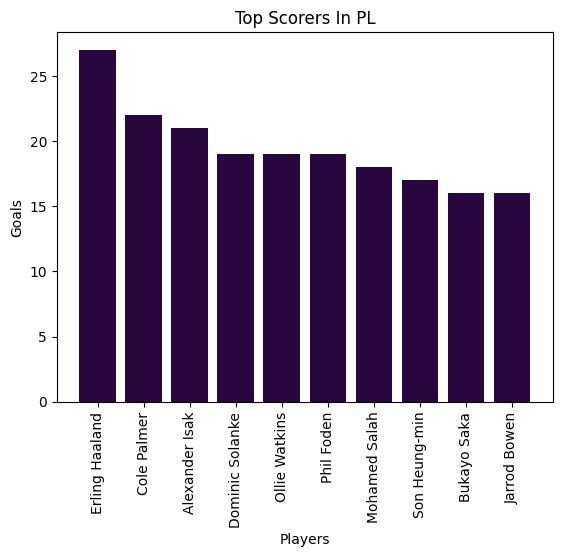

In [34]:
top_scorers = df.groupby('Player')['Gls'].sum().nlargest(10).reset_index()
plt.bar(top_scorers['Player'] , top_scorers['Gls'] , color = '#27073e')
plt.title('Top Scorers In PL')
plt.xlabel('Players')
plt.ylabel('Goals')
plt.xticks(rotation = 90)
plt.show()

## Top 10 Teams Scores Goals??

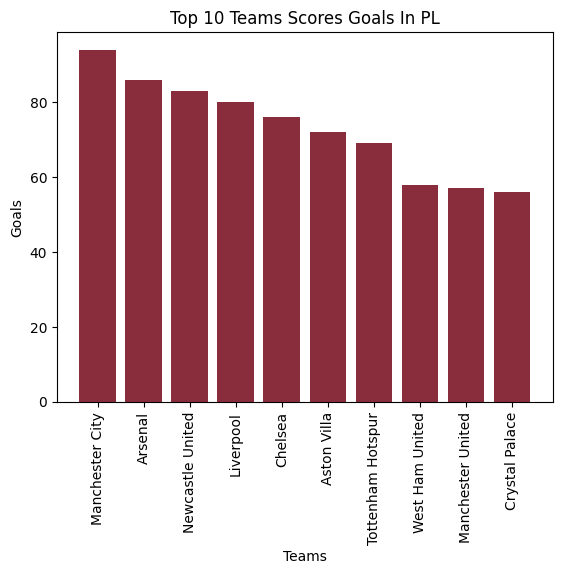

In [35]:
top_goals_teams = df.groupby('Team')['Gls'].sum().nlargest(10).reset_index()
plt.bar(top_goals_teams['Team'] , top_goals_teams['Gls'] , color = '#892d3d')
plt.title('Top 10 Teams Scores Goals In PL')
plt.xlabel('Teams')
plt.ylabel('Goals')
plt.xticks(rotation = 90)
plt.show()

## Top 10 MF Scorers??

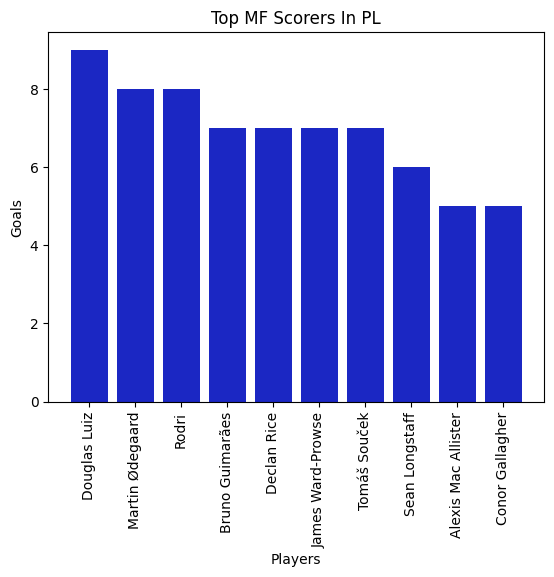

In [36]:
players_mf = df[df['Pos'] == 'MF']
top_mf_scorers = players_mf.groupby('Player')['Gls'].sum().nlargest(10).reset_index()
plt.bar(top_mf_scorers['Player'] , top_mf_scorers['Gls'] , color = '#1b27c3')
plt.title('Top MF Scorers In PL')
plt.xlabel('Players')
plt.ylabel('Goals')
plt.xticks(rotation = 90)
plt.show()

## Top 10 DF Scorers??

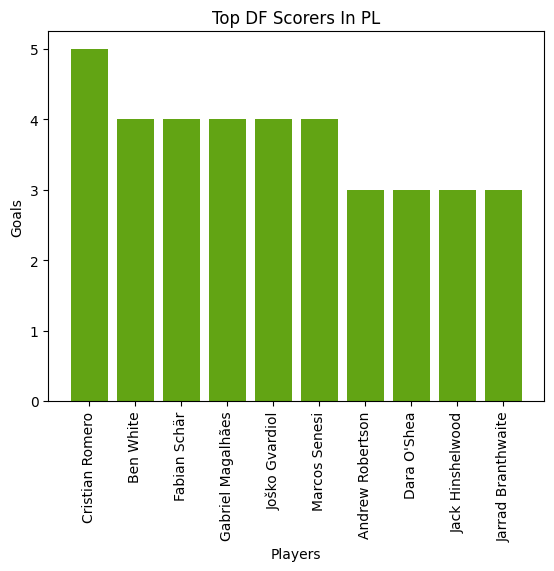

In [37]:
players_df = df[df['Pos'] == 'DF']
top_df_scorers = players_df.groupby('Player')['Gls'].sum().nlargest(10).reset_index()
plt.bar(top_df_scorers['Player'] , top_df_scorers['Gls'] , color = '#62a414')
plt.title('Top DF Scorers In PL')
plt.xlabel('Players')
plt.ylabel('Goals')
plt.xticks(rotation = 90)
plt.show()

## Top 10 Teams Them Foreign Players Have Goals In PL??

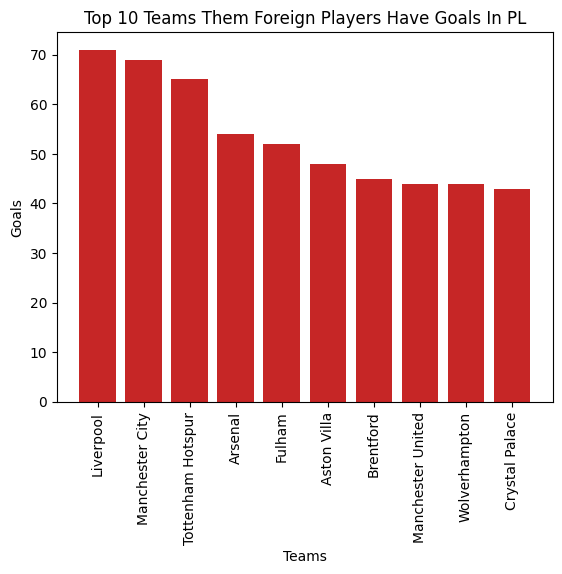

In [38]:
top_foreign_players = not_england_players.groupby('Team')['Gls'].sum().nlargest(10).reset_index()
plt.bar(top_foreign_players['Team'] , top_foreign_players['Gls'] , color = '#c62626')
plt.title('Top 10 Teams Them Foreign Players Have Goals In PL')
plt.xlabel('Teams')
plt.ylabel('Goals')
plt.xticks(rotation = 90)
plt.show()

In [39]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls_90', 'Ast_90', 'G+A_90',
       'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90', 'xG+xAG_90', 'npxG_90',
       'npxG+xAG_90', 'Team'],
      dtype='object')

## Top 10 Teams Scores Without Penalties In PL??

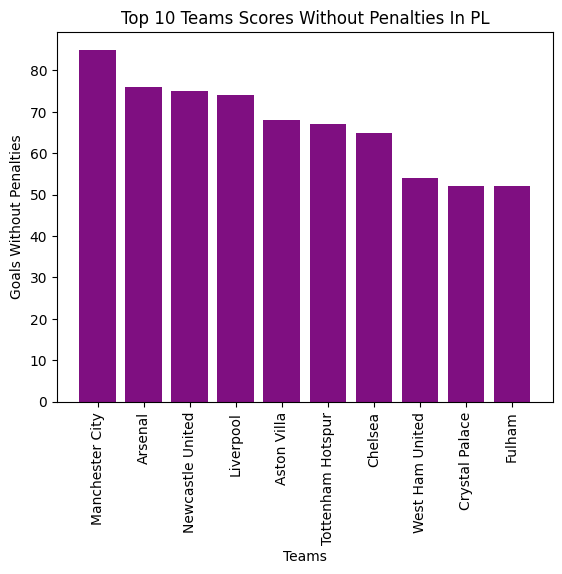

In [40]:
top_without_penalties_teams = df.groupby('Team')['G-PK'].sum().nlargest(10).reset_index()
plt.bar(top_without_penalties_teams['Team'] , top_without_penalties_teams['G-PK'] , color = '#7f0f81')
plt.title('Top 10 Teams Scores Without Penalties In PL')
plt.xlabel('Teams')
plt.ylabel('Goals Without Penalties')
plt.xticks(rotation = 90)
plt.show()

## Top 10 Teams Scores From Penalties In PL??

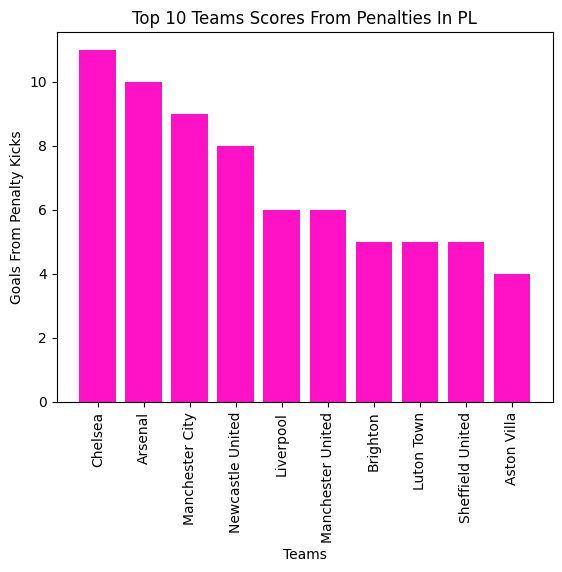

In [41]:
top_penalties_teams = df.groupby('Team')['PK'].sum().nlargest(10).reset_index()
plt.bar(top_penalties_teams['Team'] , top_penalties_teams['PK'] , color = '#ff11c5')
plt.title('Top 10 Teams Scores From Penalties In PL')
plt.xlabel('Teams')
plt.ylabel('Goals From Penalty Kicks')
plt.xticks(rotation = 90)
plt.show()

## Top 10 Players Scores Without Penalties In PL??

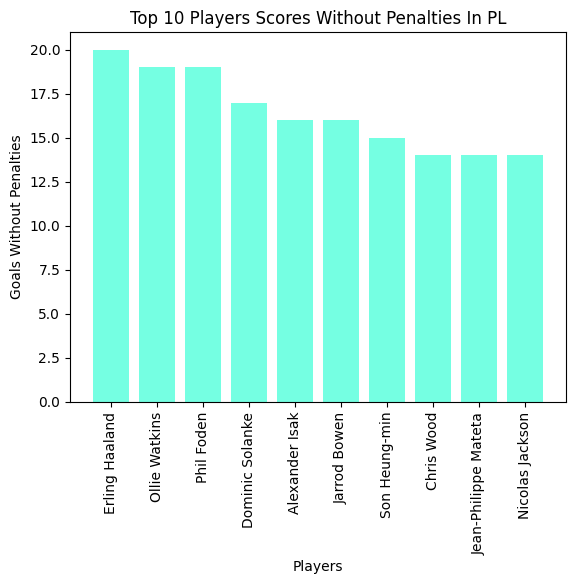

In [42]:
top_without_penalties = df.groupby('Player')['G-PK'].sum().nlargest(10).reset_index()
plt.bar(top_without_penalties['Player'] , top_without_penalties['G-PK'] , color = '#75ffe2')
plt.title('Top 10 Players Scores Without Penalties In PL')
plt.xlabel('Players')
plt.ylabel('Goals Without Penalties')
plt.xticks(rotation = 90)
plt.show()

## Top 10 Players Scores From Penalties In PL??

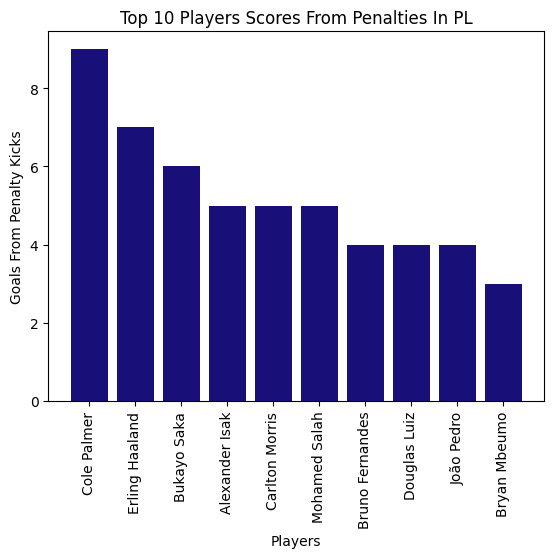

In [43]:
top_penalties = df.groupby('Player')['PK'].sum().nlargest(10).reset_index()
plt.bar(top_penalties['Player'] , top_penalties['PK'] , color = '#180f78')
plt.title('Top 10 Players Scores From Penalties In PL')
plt.xlabel('Players')
plt.ylabel('Goals From Penalty Kicks')
plt.xticks(rotation = 90)
plt.show()

# Working On xG Column

## Create Difference Between XG And Goals 

In [44]:
df['XG-Goals'] = df['xG'] - df['Gls']
df

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,XG-Goals
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City,-3.9
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City,-8.7
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City,0.0
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City,2.0
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Sam Curtis,ie IRL,DF,17.0,1,0,28.0,0.3,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,0.0
576,Daniel Jebbison,eng ENG,FW,19.0,1,0,21.0,0.2,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,0.0
577,Antwoine Hackford,eng ENG,FW,19.0,2,0,13.0,0.1,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,0.0
578,Sydie Peck,eng ENG,MF,18.0,1,0,10.0,0.1,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,0.0


## Group Teams By Difference Between XG And Goals

In [45]:
xg_goals_difference_per_teams = df.groupby('Team')['XG-Goals'].sum().reset_index()
xg_goals_difference_per_teams['XG-Goals'] = xg_goals_difference_per_teams['XG-Goals'].apply(lambda x: f"{x:.1f}")
xg_goals_difference_per_teams

,Team,XG-Goals
0,Arsenal,-7.9
1,Aston Villa,-6.8
2,Bournemouth,5.3
3,Brentford,6.2
4,Brighton,8.0
5,Burnley,1.1
6,Chelsea,0.0
7,Crystal Palace,-6.9
8,Everton,16.2
9,Fulham,-1.7


## Top 10 Teams Have XG??

In [46]:
top_teams_xg = df.groupby('Team')['xG'].sum().nlargest(10).reset_index()
top_teams_xg

,Team,xG
0,Liverpool,90.3
1,Manchester City,82.0
2,Arsenal,78.1
3,Newcastle United,77.7
4,Chelsea,76.0
5,Tottenham Hotspur,69.0
6,Aston Villa,65.2
7,Brentford,60.2
8,Brighton,58.0
9,Bournemouth,57.3


## Top 10 Teams Waste Goals??

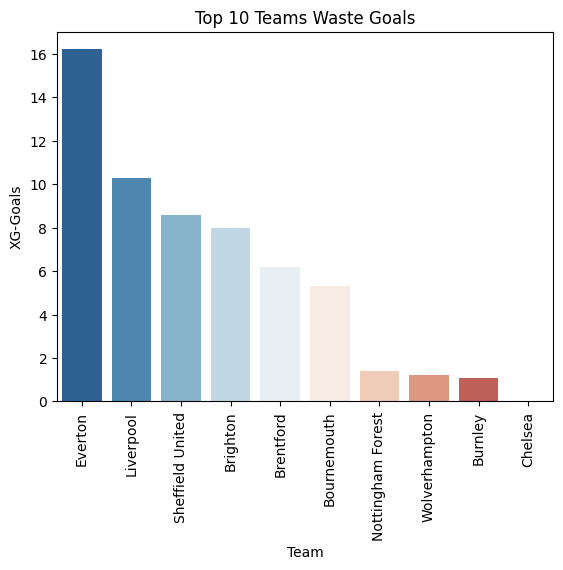

In [47]:
xg_goals_difference_per_teams['XG-Goals'] = pd.to_numeric(xg_goals_difference_per_teams['XG-Goals'], errors='coerce')
most_teams_waste_goals = xg_goals_difference_per_teams.nlargest(10, 'XG-Goals')
sns.barplot(x = 'Team' , y = 'XG-Goals' , data = most_teams_waste_goals , palette = 'RdBu_r')
plt.title('Top 10 Teams Waste Goals')
plt.xlabel('Team')
plt.ylabel('XG-Goals')
plt.xticks(rotation = 90)
plt.show()

## Top 10 Teams Exploited The Chances??

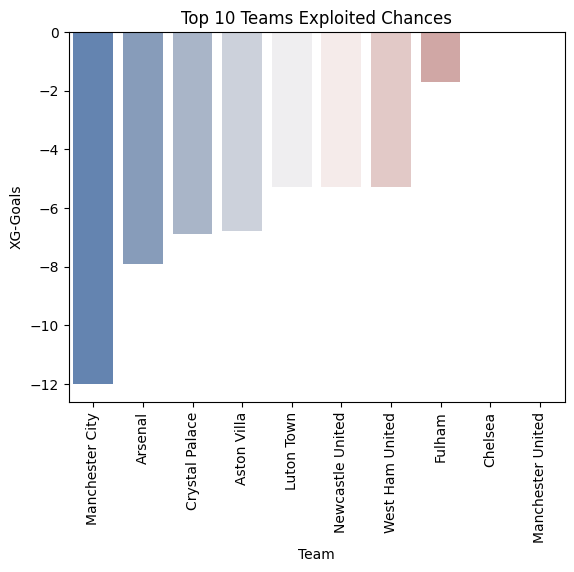

In [48]:
most_teams_exploited_goals = xg_goals_difference_per_teams.nsmallest(10, 'XG-Goals')
sns.barplot(x = 'Team' , y = 'XG-Goals' , data = most_teams_exploited_goals , palette = 'vlag')
plt.title('Top 10 Teams Exploited Chances')
plt.xlabel('Team')
plt.ylabel('XG-Goals')
plt.xticks(rotation = 90)
plt.show()

# Working On PrgC Column

## Top 10 Players Carries Ball Forward??

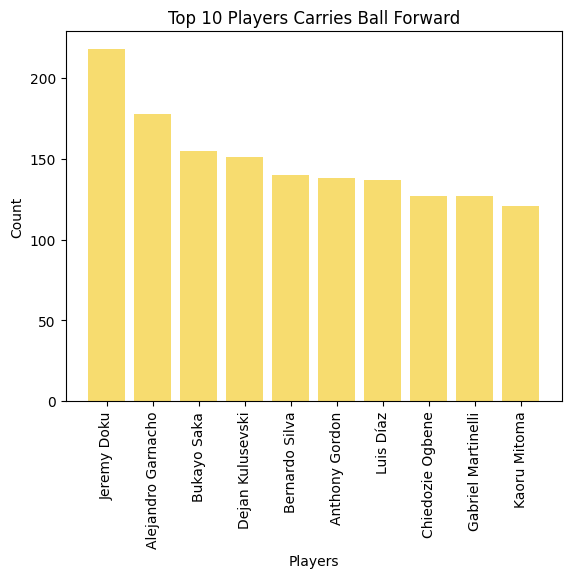

In [49]:
positive_players = df.groupby('Player')['PrgC'].sum().nlargest(10).reset_index()
plt.bar(positive_players['Player'] , positive_players['PrgC'] , color = '#f7dc6f')
plt.title('Top 10 Players Carries Ball Forward')
plt.xlabel('Players')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## Top 10 MF Players Carries Ball Forward

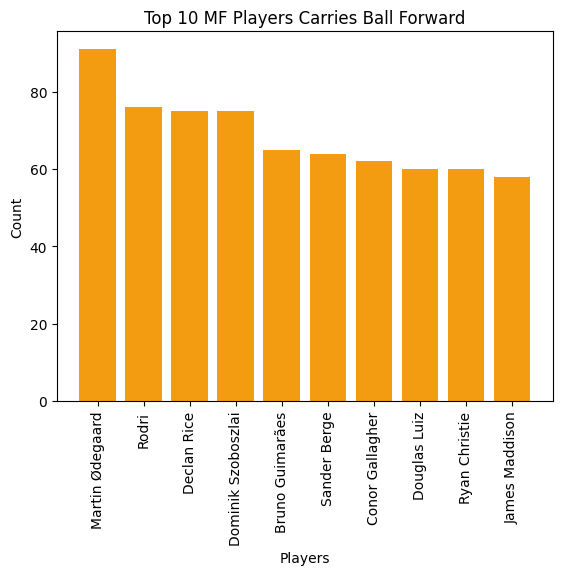

In [50]:
positive_mf_players = players_mf.groupby('Player')['PrgC'].sum().nlargest(10).reset_index()
plt.bar(positive_mf_players['Player'] , positive_mf_players['PrgC'] , color = '#f39c12')
plt.title('Top 10 MF Players Carries Ball Forward')
plt.xlabel('Players')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## Top 10 DF Players Carries Ball Forward??

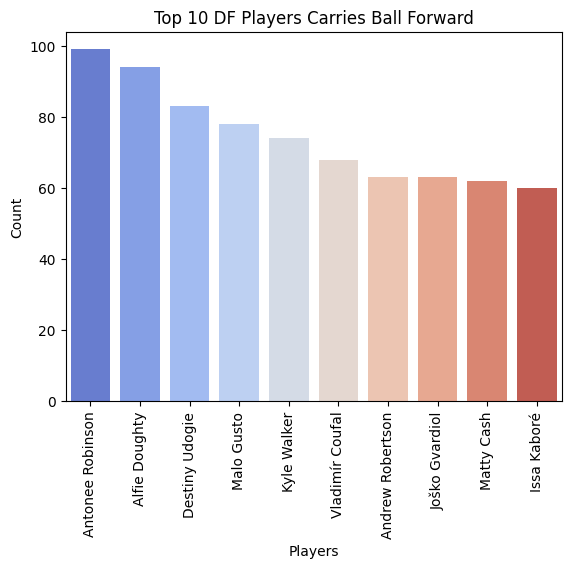

In [51]:
positive_df_players = players_df.groupby('Player')['PrgC'].sum().nlargest(10).reset_index()
sns.barplot(x='Player', y='PrgC', data=positive_df_players, palette='coolwarm')
plt.title('Top 10 DF Players Carries Ball Forward')
plt.xlabel('Players')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## Top 10 FW MF Jocker Players Ball Forward??

In [52]:
players_fw_jockers = df[(df['Pos'] == 'FW') | (df['Pos'] == 'MF,FW')]
players_fw_jockers

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,XG-Goals
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City,2.0
5,Bernardo Silva,pt POR,"MF,FW",28.0,33,29,2578.0,28.6,6.0,9.0,...,0.52,0.21,0.52,0.13,0.27,0.40,0.13,0.40,Manchester City,-2.3
6,Erling Haaland,no NOR,FW,23.0,31,29,2552.0,28.4,27.0,5.0,...,1.13,0.71,0.88,1.03,0.15,1.18,0.81,0.96,Manchester City,2.2
26,Luis Díaz,co COL,FW,26.0,37,32,2629.0,29.2,8.0,5.0,...,0.45,0.27,0.45,0.41,0.19,0.60,0.41,0.60,Liverpool,3.9
28,Mohamed Salah,eg EGY,FW,31.0,32,28,2534.0,28.2,18.0,10.0,...,0.99,0.46,0.82,0.75,0.42,1.17,0.55,0.97,Liverpool,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,Oliver McBurnie,sct SCO,FW,27.0,21,15,1280.0,14.2,6.0,3.0,...,0.63,0.28,0.49,0.48,0.14,0.62,0.37,0.51,Sheffield United,0.9
562,William Osula,dk DEN,FW,19.0,21,9,786.0,8.7,0.0,0.0,...,0.00,0.00,0.00,0.19,0.01,0.20,0.19,0.20,Sheffield United,1.6
576,Daniel Jebbison,eng ENG,FW,19.0,1,0,21.0,0.2,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,0.0
577,Antwoine Hackford,eng ENG,FW,19.0,2,0,13.0,0.1,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,0.0


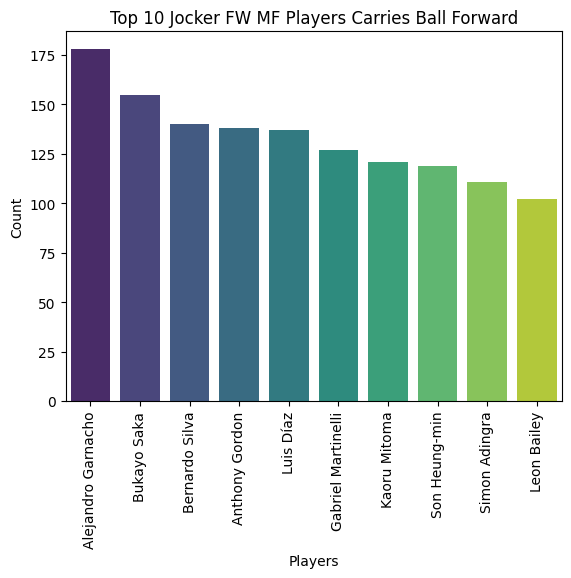

In [53]:
positive_fw_or_mf_players = players_fw_jockers.groupby('Player')['PrgC'].sum().nlargest(10).reset_index()
sns.barplot(x='Player', y='PrgC', data=positive_fw_or_mf_players, palette='viridis')
plt.title('Top 10 Jocker FW MF Players Carries Ball Forward')
plt.xlabel('Players')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

# Working On PrgP Column??

## Top 10 Players Pass Ball Forward??

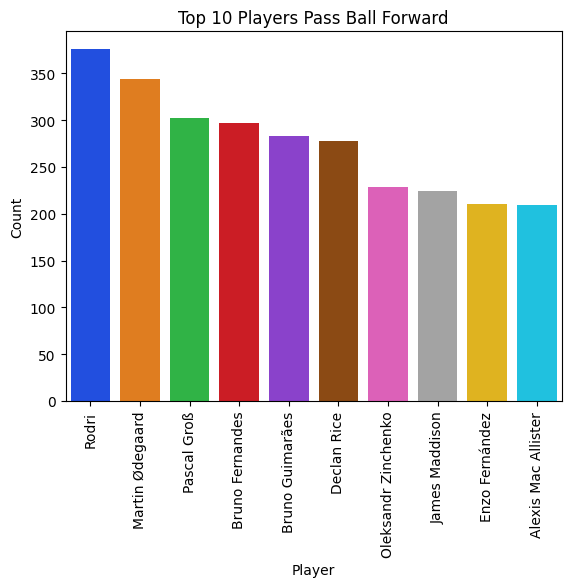

In [54]:
players_pass_ball_forward = df.groupby('Player')['PrgP'].sum().nlargest(10).reset_index()
sns.barplot(x = 'Player' , y = 'PrgP' , data = players_pass_ball_forward , palette = 'bright')
plt.title('Top 10 Players Pass Ball Forward')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## Top 10 MF Players Pass Ball Forward??

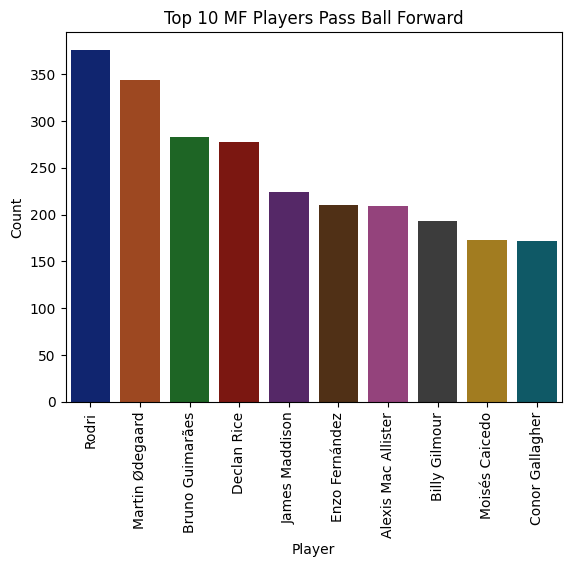

In [55]:
top_ten_MF_players_pass_ball_forward = players_mf.groupby('Player')['PrgP'].sum().nlargest(10).reset_index()
sns.barplot(x = 'Player' , y = 'PrgP' , data = top_ten_MF_players_pass_ball_forward , palette = 'dark')
plt.title('Top 10 MF Players Pass Ball Forward')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## Top 10 DF Players Pass Ball Forward??

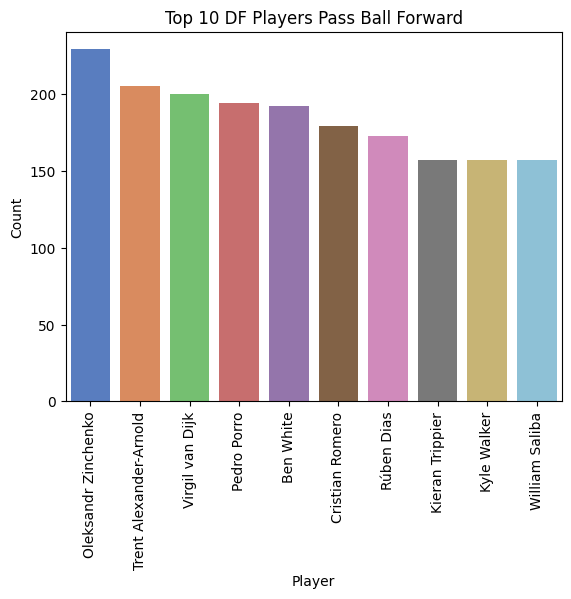

In [56]:
top_ten_DF_players_pass_ball_forward = players_df.groupby('Player')['PrgP'].sum().nlargest(10).reset_index()
sns.barplot(x = 'Player' , y = 'PrgP' , data = top_ten_DF_players_pass_ball_forward , palette = 'muted')
plt.title('Top 10 DF Players Pass Ball Forward')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## MF Players Played Above 5 Matches

In [57]:
mf_players_played_above_5_matches = df[(df['Pos'] == 'MF') & (df['MP'] > 5)]
mf_players_played_above_5_matches

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,XG-Goals
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City,-3.9
12,Mateo Kovačić,hr CRO,MF,29.0,30,16,1551.0,17.2,1.0,0.0,...,0.06,0.06,0.06,0.07,0.09,0.17,0.07,0.17,Manchester City,0.3
13,Kevin De Bruyne,be BEL,MF,32.0,18,15,1221.0,13.6,4.0,10.0,...,1.03,0.29,1.03,0.18,0.85,1.03,0.18,1.03,Manchester City,-1.6
17,Matheus Nunes,pt POR,MF,24.0,17,7,661.0,7.3,0.0,2.0,...,0.27,0.00,0.27,0.11,0.15,0.27,0.11,0.27,Manchester City,0.8
27,Alexis Mac Allister,ar ARG,MF,24.0,33,31,2599.0,28.9,5.0,5.0,...,0.35,0.14,0.31,0.13,0.12,0.25,0.10,0.22,Liverpool,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,Vinicius Souza,br BRA,MF,24.0,36,29,2668.0,29.6,1.0,0.0,...,0.03,0.03,0.03,0.02,0.01,0.03,0.02,0.03,Sheffield United,-0.4
554,Oliver Norwood,nir NIR,MF,32.0,27,16,1440.0,16.0,1.0,0.0,...,0.06,0.00,0.00,0.07,0.04,0.11,0.02,0.06,Sheffield United,0.1
560,Oliver Arblaster,eng ENG,MF,19.0,12,11,943.0,10.5,0.0,0.0,...,0.00,0.00,0.00,0.00,0.07,0.07,0.00,0.07,Sheffield United,0.0
568,Anis Ben Slimane,tn TUN,MF,22.0,15,4,419.0,4.7,0.0,0.0,...,0.00,0.00,0.00,0.17,0.06,0.23,0.17,0.23,Sheffield United,0.8


## Latest 10 MF Players Played Above 5 Matches Pass Ball Forward??

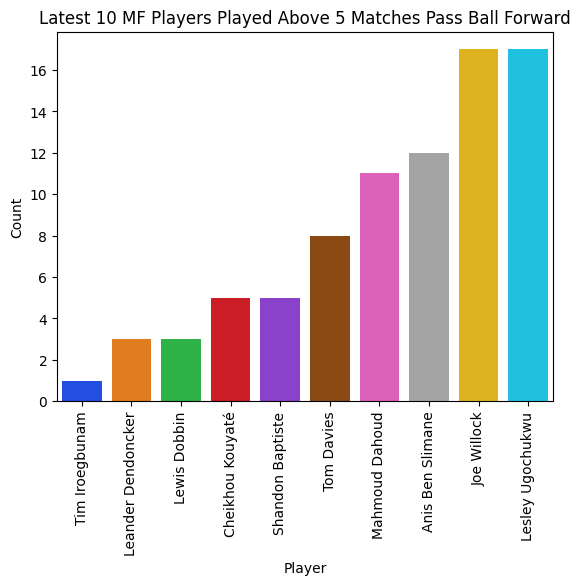

In [58]:
latest_ten_mf_palyers_5_matches_pass_ball_forward = mf_players_played_above_5_matches.groupby('Player')['PrgP'].sum().nsmallest(10).reset_index()
sns.barplot(x = 'Player' , y = 'PrgP' , data = latest_ten_mf_palyers_5_matches_pass_ball_forward , palette = 'bright')
plt.title('Latest 10 MF Players Played Above 5 Matches Pass Ball Forward')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

## DF Players Played Above 5 Matches

In [59]:
df_players_played_above_5_matches = df[(df['Pos'] == 'DF') & (df['MP'] > 5)]
df_players_played_above_5_matches

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,XG-Goals
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City,0.4
7,Rúben Dias,pt POR,DF,26.0,30,28,2559.0,28.4,0.0,0.0,...,0.00,0.00,0.00,0.05,0.01,0.06,0.05,0.06,Manchester City,1.4
9,Joško Gvardiol,hr CRO,DF,21.0,28,26,2328.0,25.9,4.0,1.0,...,0.19,0.15,0.19,0.12,0.06,0.18,0.12,0.18,Manchester City,-0.9
10,Nathan Aké,nl NED,DF,28.0,29,24,2042.0,22.7,2.0,2.0,...,0.18,0.09,0.18,0.11,0.05,0.16,0.11,0.16,Manchester City,0.5
25,Virgil van Dijk,nl NED,DF,32.0,36,36,3177.0,35.3,2.0,2.0,...,0.11,0.06,0.11,0.08,0.04,0.12,0.08,0.12,Liverpool,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,George Baldock,gr GRE,DF,30.0,13,11,969.0,10.8,0.0,1.0,...,0.09,0.00,0.09,0.00,0.07,0.08,0.00,0.08,Sheffield United,0.0
561,Luke Thomas,eng ENG,DF,22.0,12,11,917.0,10.2,0.0,0.0,...,0.00,0.00,0.00,0.05,0.00,0.06,0.05,0.06,Sheffield United,0.5
564,Mason Holgate,eng ENG,DF,26.0,10,9,710.0,7.9,0.0,0.0,...,0.00,0.00,0.00,0.08,0.05,0.13,0.08,0.13,Sheffield United,0.6
565,Yasser Larouci,dz ALG,DF,22.0,11,6,531.0,5.9,0.0,0.0,...,0.00,0.00,0.00,0.04,0.05,0.09,0.04,0.09,Sheffield United,0.2


## Latest 10 DF Players Played Above 5 Matches Pass Ball Forward??

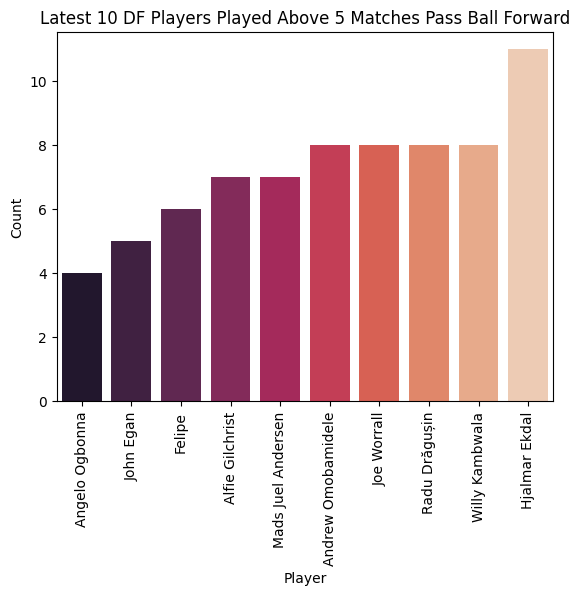

In [60]:
latest_ten_df_palyers_5_matches_pass_ball_forward = df_players_played_above_5_matches.groupby('Player')['PrgP'].sum().nsmallest(10).reset_index()
sns.barplot(x = 'Player' , y = 'PrgP' , data = latest_ten_df_palyers_5_matches_pass_ball_forward , palette = 'rocket')
plt.title('Latest 10 DF Players Played Above 5 Matches Pass Ball Forward')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()